<p style="font-family: Trebuchet MS; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #b20710">🍁 TPS SEPTEMBER 2021 🍂</p>

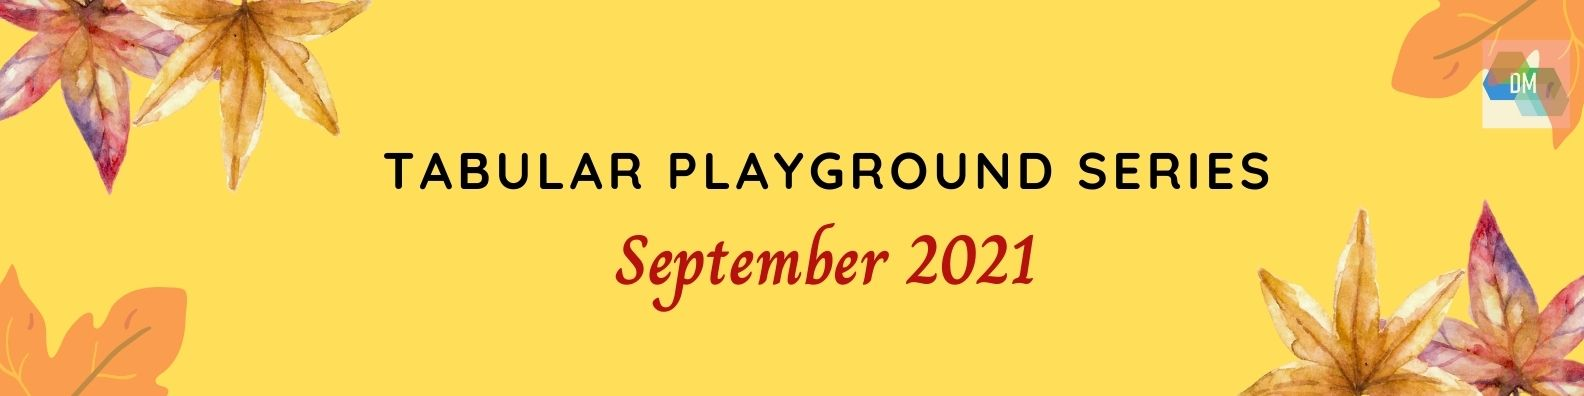

<p style = "font-family: Trebuchet MS; font-size: 16px; color: rgba(0,0,0,.7)"> Observations on this TPS: <li>1. 'claim' column is the target variable </li> <li>2. Train dataset has 957,919 rows and 120 columns</li><li>3. Test dataset has 493,474 rows and 119 columns</li><li>4. In train dataset, every feature has nearly 15,000 missing values totalling 1,820,782 in all</li><li>5. In test dataset, every feature has almost 7,800 missing values totalling 936,218 in all</li></p>

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train= pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
df_subm= pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#CC5803","#E2711D","#FF9505","#FFB627","#FFC971"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [ ]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

In [ ]:
df_test.describe().T

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
x = df_train['claim'].value_counts()

fig,ax=plt.subplots(figsize=(7,4))
ax.barh([1],x.values[1],height=0.7,color='#CC5803',alpha=0.7)
plt.text(-35000,1, '1', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(500000,1, '49.84%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0],height=0.7,color='#FFB627',alpha=0.7)
plt.text(-35000,0,'0',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(500000,0, '50.15%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How claim is distributed? - 0 vs 1',{'font': 'Trebuchet MS','weight':'bold','Size': '20','style':'normal', 'color':'#FF9505'}, alpha = 0.9)
plt.text(600000,1.65, '0 ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#FFB627'},alpha = 0.8)
plt.text(615000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(625000,1.65, '1',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#CC5803'},alpha = 0.7)
plt.text(-50,1.5, 'Nearly equal distribution')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>LightAutoML ⏳</centre></strong></h3>

pip install lightautoml 

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [ ]:
task = Task('binary')
roles = {'target': 'claim'}
THREADS = 12
FOLDS = 10
RANDOM = 42
SIZE = 0.2
TIMEOUT = 1200
TARGET = 'claim'

In [ ]:
automl = TabularAutoML(task = task, timeout = TIMEOUT, cpu_limit = THREADS,
                       reader_params = {'n_jobs': THREADS, 'cv': FOLDS, 'random_state': RANDOM})
pred = automl.fit_predict(df_train, roles = roles,verbose = 3)

In [ ]:
pred = automl.predict(df_test)

In [ ]:
df_subm['claim'] = pred.data[:, 0]
df_subm

In [ ]:
df_subm.to_csv('submission_lightautoml.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>H2O ⏳</centre></strong></h3>

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

In [ ]:
train = df_train.drop('id',axis=1)
test = df_test.drop('id',axis=1)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

In [ ]:
x = train.columns
y = "claim"
x.remove(y)

aml = H2OAutoML(max_models = 20, nfolds = 5, seed = 1,max_runtime_secs = 800)
aml.train(x = x, y = y, training_frame = train)

In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

In [ ]:
model_plot = aml.model_correlation_heatmap(train)

In [ ]:
preds = aml.leader.predict(test)
df_subm['claim'] = h2o.as_list(preds)['predict']
df_subm.to_csv("submission_h2o.csv",index = None)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>